In [23]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [24]:

encoding_dim = 20
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

In [25]:
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [26]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [27]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [28]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [30]:
autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                validation_data=(x_test, x_test))

Epoch 1/15
235/235 [==============================] - 1s 5ms/step - loss: 0.2976 - val_loss: 0.2104
Epoch 2/15
235/235 [==============================] - 1s 5ms/step - loss: 0.1886 - val_loss: 0.1708
Epoch 3/15
235/235 [==============================] - 1s 4ms/step - loss: 0.1620 - val_loss: 0.1514
Epoch 4/15
235/235 [==============================] - 1s 5ms/step - loss: 0.1465 - val_loss: 0.1397
Epoch 5/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1376 - val_loss: 0.1330
Epoch 6/15
235/235 [==============================] - 1s 5ms/step - loss: 0.1323 - val_loss: 0.1288
Epoch 7/15
235/235 [==============================] - 1s 5ms/step - loss: 0.1288 - val_loss: 0.1260
Epoch 8/15
235/235 [==============================] - 1s 5ms/step - loss: 0.1262 - val_loss: 0.1235
Epoch 9/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1240 - val_loss: 0.1215
Epoch 10/15
235/235 [==============================] - 1s 5ms/step - loss: 0.1222 - val_loss: 0.1198

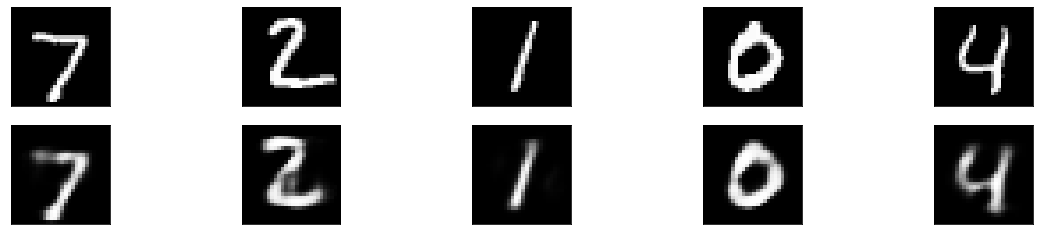

In [40]:
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Imagens originais
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagens reconstruidas
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()